## Lending Club Case Study

### Problem Statement
    Company giving different types of loans. lending loans to ‘risky’ applicants is the largest source of financial loss. Need to identify these  risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss.Identification of such applicants with strong driving factors using EDA is the aim of this case study.
    

### Importing Necessary Library

In [2]:
#Import Necessary Libraries
import numpy as np
import pandas as pd
#Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Purpose to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Data Load
loan_df=pd.read_csv('loan.csv')
#check data for some records
loan_df.head() 

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
#As we can't see complete column list so do below setting to check complete list
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 300)
pd.set_option('display.width', 1000)
#check shape of Dataset
loan_df.shape

(39717, 111)

In [5]:
#check details about columns and its types
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### Data Handling and Cleaning
#### Missing Values Check

In [6]:
loan_df.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12942
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


### Null Value Treatment
#### Drop columns

In [7]:
# Most of the columns are having all null values so drop these columns
loan_df.dropna(axis=1, how="all", subset=None, inplace=True)

In [8]:
#There are some columns like title,url,desc,zip_code,addr_state which states metadata and seems irrelevent for loan case study.
#Also there are columns that comes into picture after loan processing and which does not contribute to find pattern for defaulters.
#like last_pymnt_d,last_pymnt_amnt,next_pymnt_d,recoveries,mths_since_last_delinq,mths_since_last_record,collection_recovery_fee
# So removing all these columns.
loan_df.drop(['title','url','desc','zip_code','addr_state','last_pymnt_d','last_pymnt_amnt','next_pymnt_d','recoveries','mths_since_last_delinq','mths_since_last_record','collection_recovery_fee','revol_bal','total_pymnt','member_id','total_rec_prncp','total_rec_int'],axis=1,inplace=True)


In [9]:
# Check rows and columns count
loan_df.shape

(39717, 40)

In [10]:
#Check unique values
loan_df.nunique()

id                            39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
purpose                          14
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                         40
pub_rec                           5
revol_util                     1089
total_acc                        82
initial_list_status               1
out_prncp                   

In [11]:
#Drop columns those are having only 1 value.
#Columns having single constant value that will not impact analysis #dropping these columns.
loan_df.drop(['tax_liens','delinq_amnt','acc_now_delinq','application_type','initial_list_status','pymnt_plan','policy_code','collections_12_mths_ex_med','chargeoff_within_12_mths'],axis=1,inplace=True)

In [12]:
#check again null values
loan_df.isnull().sum()

id                         0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title               2459
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_util                50
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt_inv            0
total_rec_late_fee         0
last_credit_pull_d         2
pub_rec_bankruptcies     697
dtype: int64

#### Data Imputation

In [13]:
loan_df.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64

In [14]:
# As maximum values are 0.0 its most likely to have single value column, so drop it
loan_df.drop('pub_rec_bankruptcies',axis=1,inplace=True)

In [15]:
#Handling null values
# 4 columns having null values check 1 by one
# find median of emp_length and emp title
loan_df['emp_length'].mode()[0]


'10+ years'

In [16]:
loan_df['emp_title'].mode()[0]

'US Army'

In [17]:
#Impute Values for null columns
#impute for emp_length column
loan_df['emp_length']=loan_df['emp_length'].fillna(loan_df['emp_length'].mode()[0])
#impute for emp_title column
loan_df['emp_title']=loan_df['emp_title'].fillna(loan_df['emp_title'].mode()[0])

In [18]:
loan_df.dropna(subset=['last_credit_pull_d'],inplace=True)
loan_df['revol_util']=loan_df['revol_util'].fillna(loan_df['revol_util'].mode()[0])

In [19]:
#check null values again
loan_df.isnull().mean()

id                     0.0
loan_amnt              0.0
funded_amnt            0.0
funded_amnt_inv        0.0
term                   0.0
int_rate               0.0
installment            0.0
grade                  0.0
sub_grade              0.0
emp_title              0.0
emp_length             0.0
home_ownership         0.0
annual_inc             0.0
verification_status    0.0
issue_d                0.0
loan_status            0.0
purpose                0.0
dti                    0.0
delinq_2yrs            0.0
earliest_cr_line       0.0
inq_last_6mths         0.0
open_acc               0.0
pub_rec                0.0
revol_util             0.0
total_acc              0.0
out_prncp              0.0
out_prncp_inv          0.0
total_pymnt_inv        0.0
total_rec_late_fee     0.0
last_credit_pull_d     0.0
dtype: float64

In [20]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39715 entries, 0 to 39716
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   39715 non-null  int64  
 1   loan_amnt            39715 non-null  int64  
 2   funded_amnt          39715 non-null  int64  
 3   funded_amnt_inv      39715 non-null  float64
 4   term                 39715 non-null  object 
 5   int_rate             39715 non-null  object 
 6   installment          39715 non-null  float64
 7   grade                39715 non-null  object 
 8   sub_grade            39715 non-null  object 
 9   emp_title            39715 non-null  object 
 10  emp_length           39715 non-null  object 
 11  home_ownership       39715 non-null  object 
 12  annual_inc           39715 non-null  float64
 13  verification_status  39715 non-null  object 
 14  issue_d              39715 non-null  object 
 15  loan_status          39715 non-null  obje

### Data Standardization

In [21]:
loan_df['revol_util'].value_counts()

revol_util
0%        1027
0.20%       63
63%         62
40.70%      58
0.10%       58
          ... 
25.74%       1
47.36%       1
24.65%       1
10.61%       1
7.28%        1
Name: count, Length: 1089, dtype: int64

In [22]:
loan_df['int_rate'].value_counts()

int_rate
10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
18.36%      1
16.96%      1
16.15%      1
16.01%      1
17.44%      1
Name: count, Length: 371, dtype: int64

In [23]:
#Remove % at end from both columns
loan_df['revol_util']=loan_df['revol_util'].apply(lambda x: float(x[:-1]))
loan_df['int_rate']=loan_df['int_rate'].apply(lambda x: float(x[:-1]))
# TO convert emp_length column into int standarzise values as 10+=10 and less that 1=0
emp_length_map: dict = {
    '< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3,
    '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7,
    '8 years': 8, '9 years': 9, '10+ years': 10
}

# Use the map function to replace values in the 'emp_length' column
loan_df['emp_length'] = loan_df['emp_length'].map(emp_length_map)
loan_df.emp_length.value_counts()

emp_length
10    9954
0     4582
2     4388
3     4095
4     3436
5     3281
1     3240
6     2229
7     1773
8     1479
9     1258
Name: count, dtype: int64

In [24]:
#cross check values again
loan_df['int_rate'].value_counts()

int_rate
10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
        ... 
18.36      1
16.96      1
16.15      1
16.01      1
17.44      1
Name: count, Length: 371, dtype: int64

In [25]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39715 entries, 0 to 39716
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   39715 non-null  int64  
 1   loan_amnt            39715 non-null  int64  
 2   funded_amnt          39715 non-null  int64  
 3   funded_amnt_inv      39715 non-null  float64
 4   term                 39715 non-null  object 
 5   int_rate             39715 non-null  float64
 6   installment          39715 non-null  float64
 7   grade                39715 non-null  object 
 8   sub_grade            39715 non-null  object 
 9   emp_title            39715 non-null  object 
 10  emp_length           39715 non-null  int64  
 11  home_ownership       39715 non-null  object 
 12  annual_inc           39715 non-null  float64
 13  verification_status  39715 non-null  object 
 14  issue_d              39715 non-null  object 
 15  loan_status          39715 non-null  obje

In [26]:
## Pick columns for analysis and divide then in Numerical and Categorical columns  
num_cols=['loan_amnt','funded_amnt','int_rate','delinq_2yrs','annual_inc','emp_length','inq_last_6mths','open_acc']
cat_cols=['grade','home_ownership','verification_status','term']
target=['loan_status']

## Data Analysis
### Univariant Analysis

#### Numerical Columns


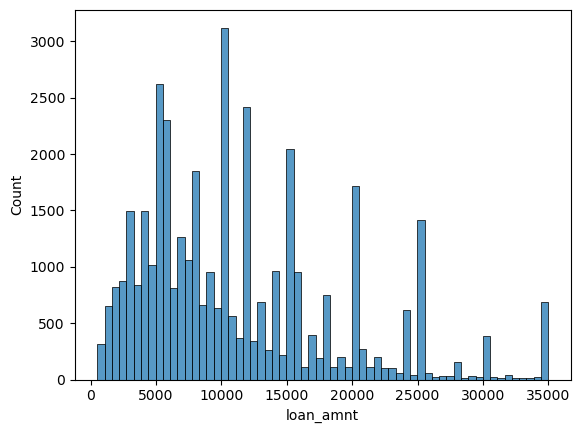

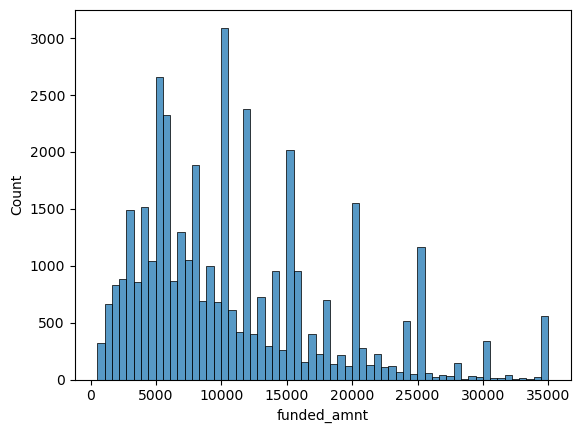

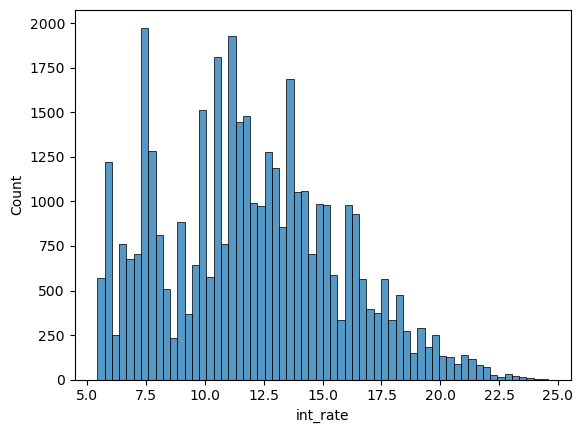

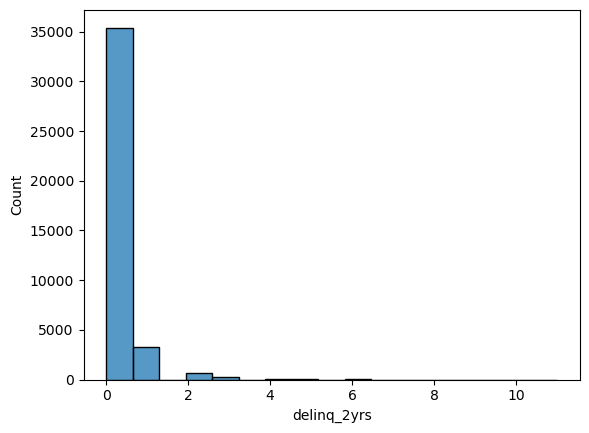

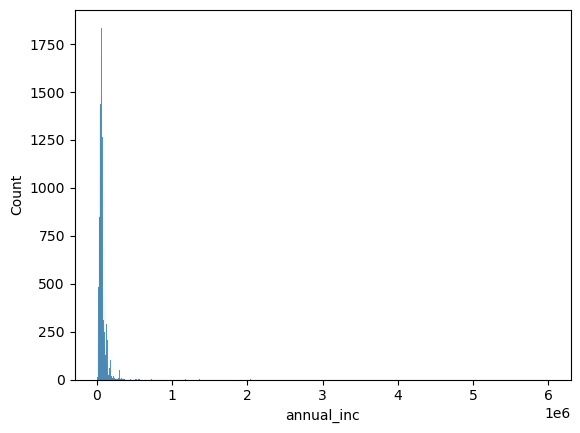

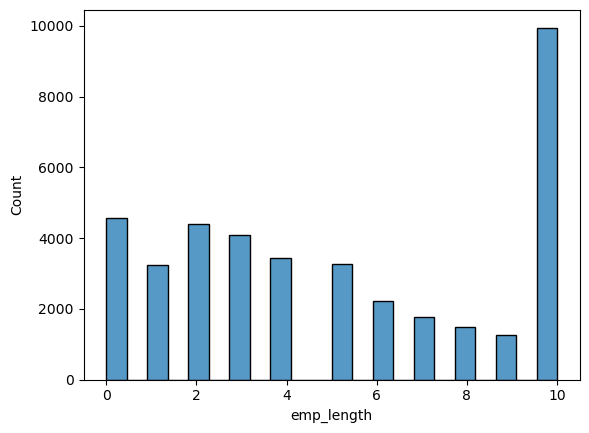

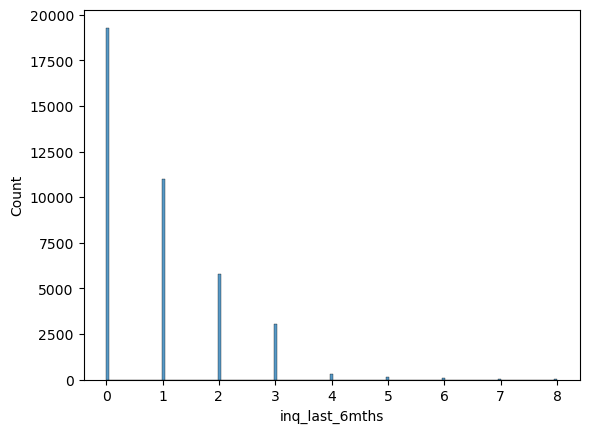

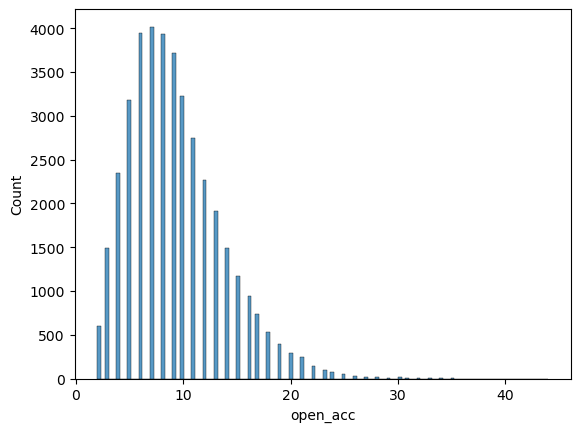

In [27]:

#Hist plot shows distribution of Numerical columns 'loan_amnt','funded_amnt','int_rate','delinq_2yrs','annual_inc',emp_length
for i in num_cols:
    sns.histplot(x=loan_df[i])
    plt.show(
    )   


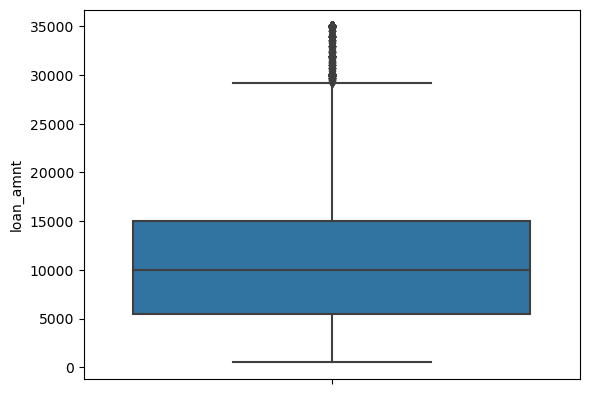

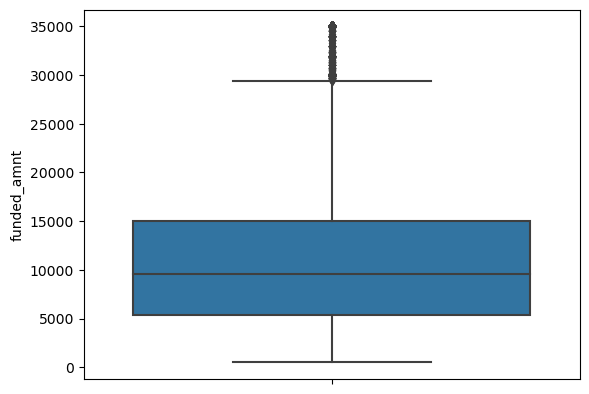

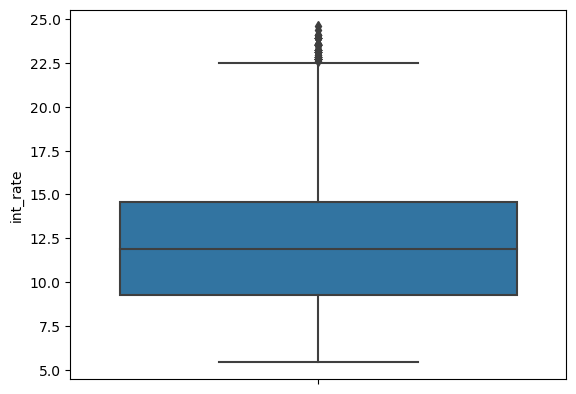

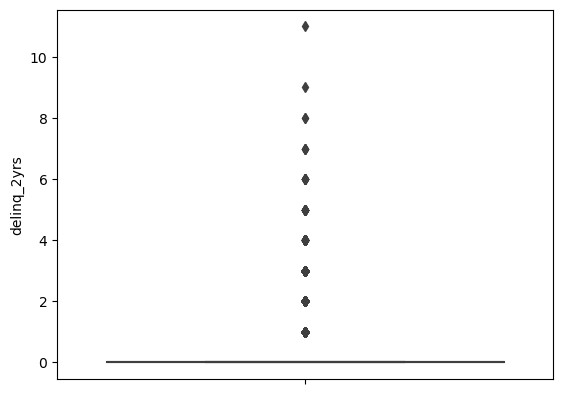

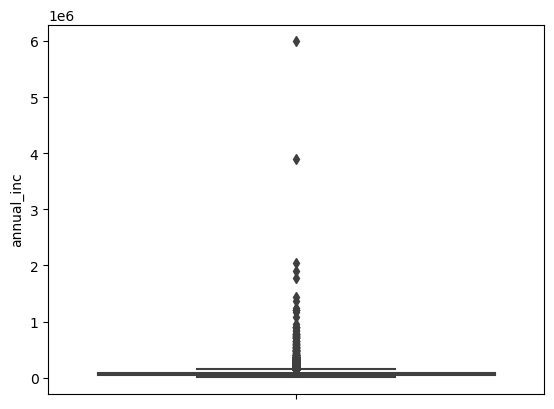

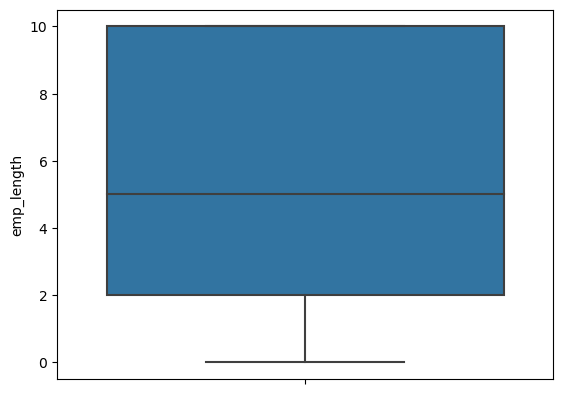

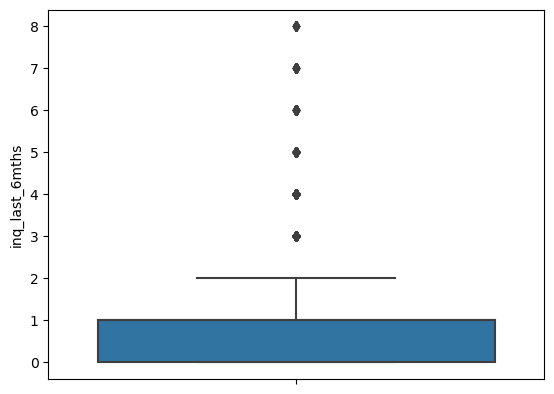

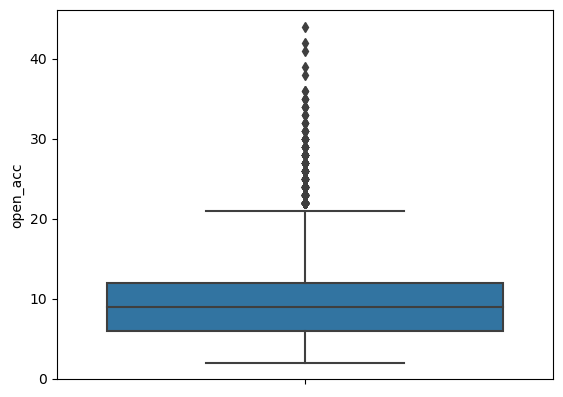

In [28]:
#Plotting Boxplot to check outliers
for i in num_cols:
    sns.boxplot(y=loan_df[i])
    plt.show(
    )

In [29]:
#Removing outliers of annual Income
loan_df=loan_df[loan_df['annual_inc']<np.percentile(loan_df['annual_inc'],98)] 

#### Categorical Columns

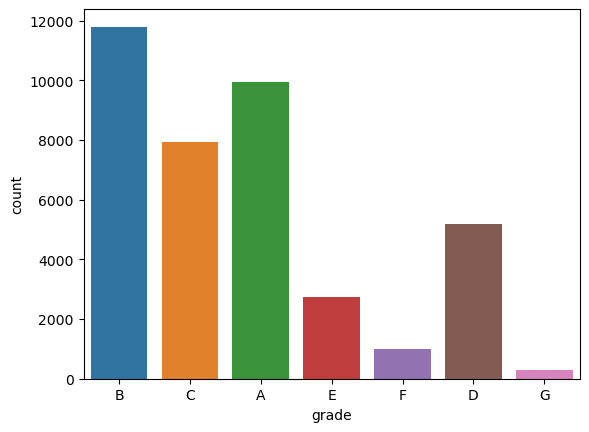

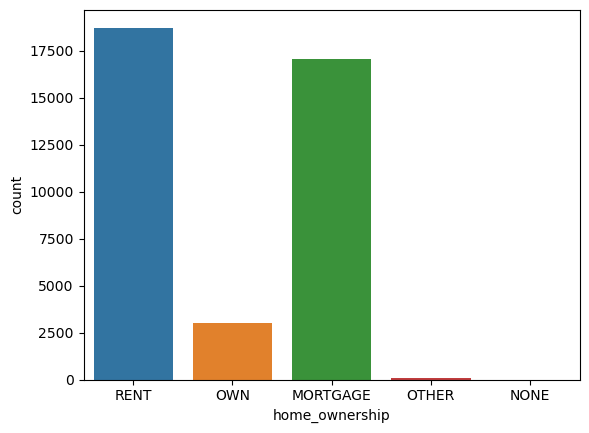

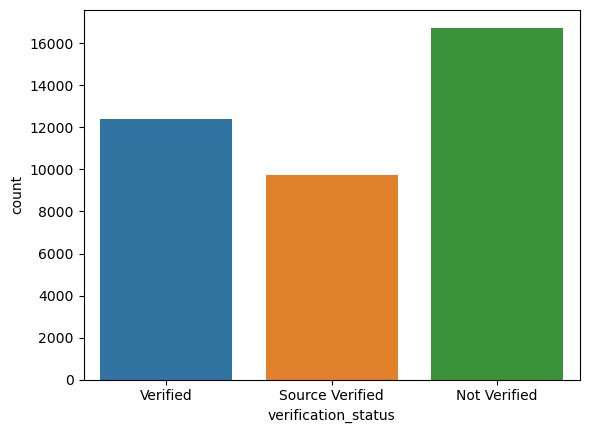

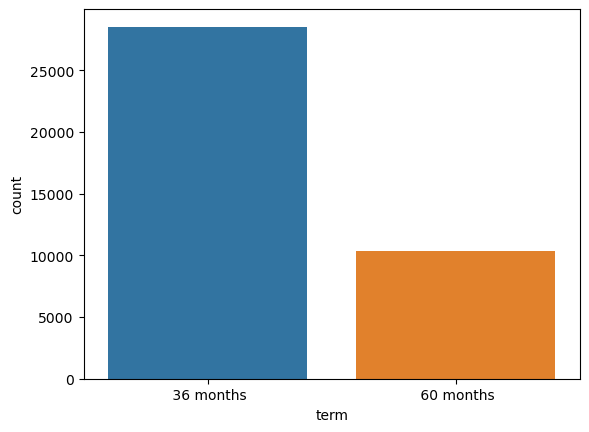

In [30]:
#Count plot for Categorical columns 
for i in cat_cols:
    sns.countplot(x=loan_df[i])
    plt.show()

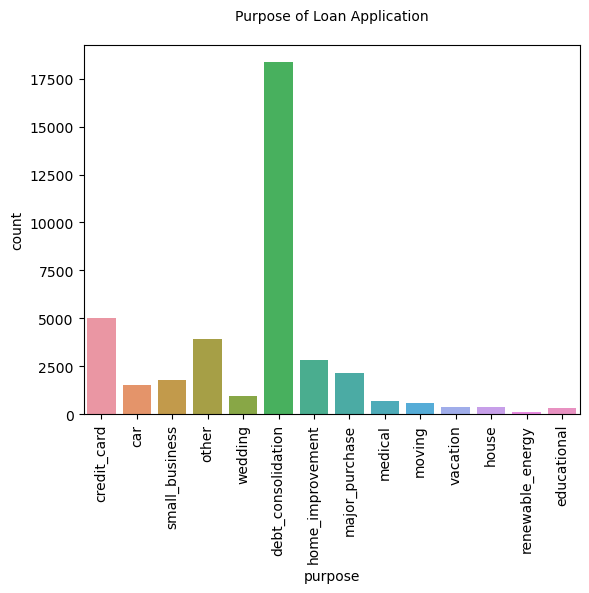

In [31]:
# Analyze purpose of loan applicants
sns.countplot(x=loan_df['purpose']) 
plt.title("Purpose of Loan Application\n",fontdict={'fontsize':10})
plt.xticks(rotation=90)
plt.show()

In [32]:
# Removing customers of home ownership of type NONE 
loan_df=loan_df[loan_df['home_ownership']!='NONE']


In [33]:
# Analyze Target variable
loan_df['loan_status'].value_counts()

loan_status
Fully Paid     32251
Charged Off     5547
Current         1116
Name: count, dtype: int64

In [34]:
#Limit dataset to have Fully Paid and Charged Off customers remove current status customers.
loan_df=loan_df[loan_df['loan_status']!='Current']

In [35]:
# Create derived column for target variable to have numeric values so that we can use that in multivariant analysis in heatmap
loan_df['der_loan_status']=loan_df['loan_status'].apply(lambda x: 1 if (x=='Charged Off') else 0)

## Bivariant Analysis

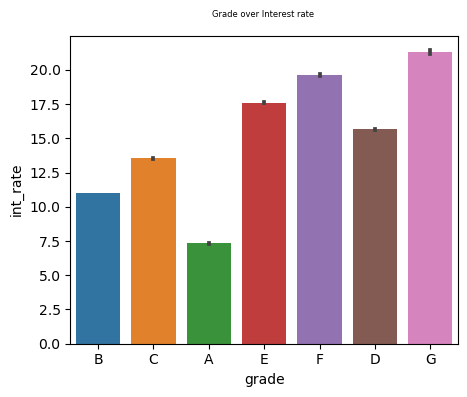

In [36]:
## Analyze interest rate with grade
fig, ax = plt.subplots(figsize = (5,4))
sns.barplot(x=loan_df["grade"],y=loan_df["int_rate"])
plt.title("Grade over Interest rate \n",fontdict={'fontsize':6})
plt.show()

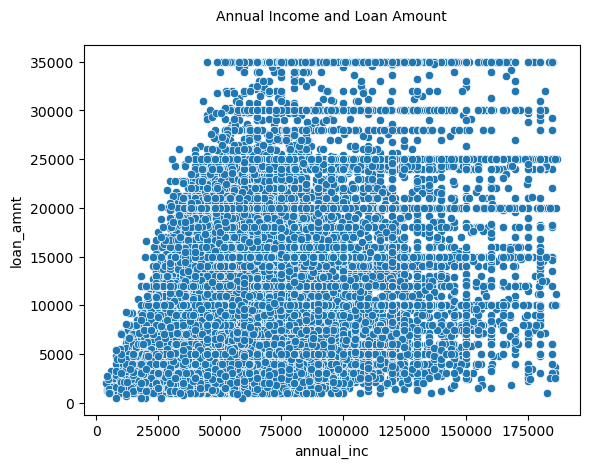

In [37]:
## Analyze loan amount with annual income
sns.scatterplot(x=loan_df["annual_inc"],y=loan_df["loan_amnt"])
plt.title("Annual Income and Loan Amount\n",fontdict={'fontsize':10})
plt.show()

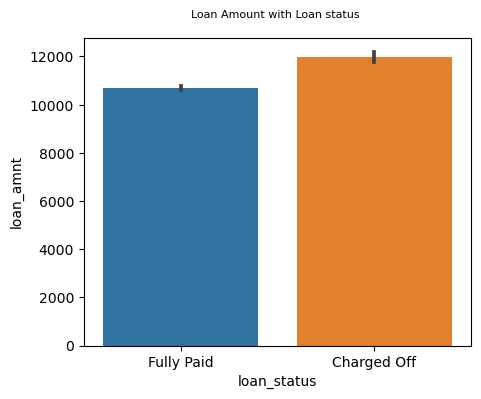

In [38]:
## Analyze interest rate with loan status
fig, ax = plt.subplots(figsize = (5,4))
sns.barplot(x=loan_df["loan_status"],y=loan_df["loan_amnt"])
plt.title("Loan Amount with Loan status \n",fontdict={'fontsize':8})
plt.show()

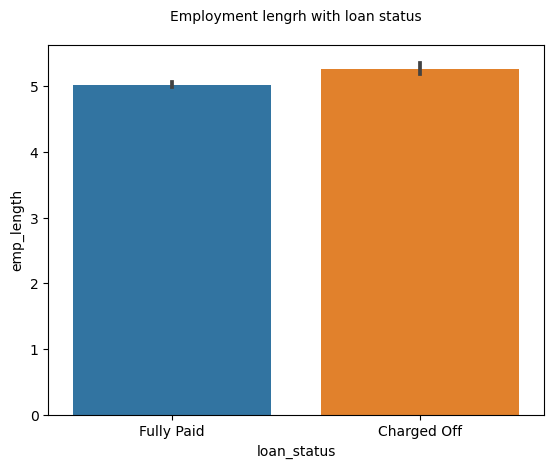

In [39]:
## Analyze emp length with loan status
sns.barplot(y=loan_df["emp_length"],x=loan_df["loan_status"])
plt.title("Employment lengrh with loan status\n",fontdict={'fontsize':10})
plt.show()

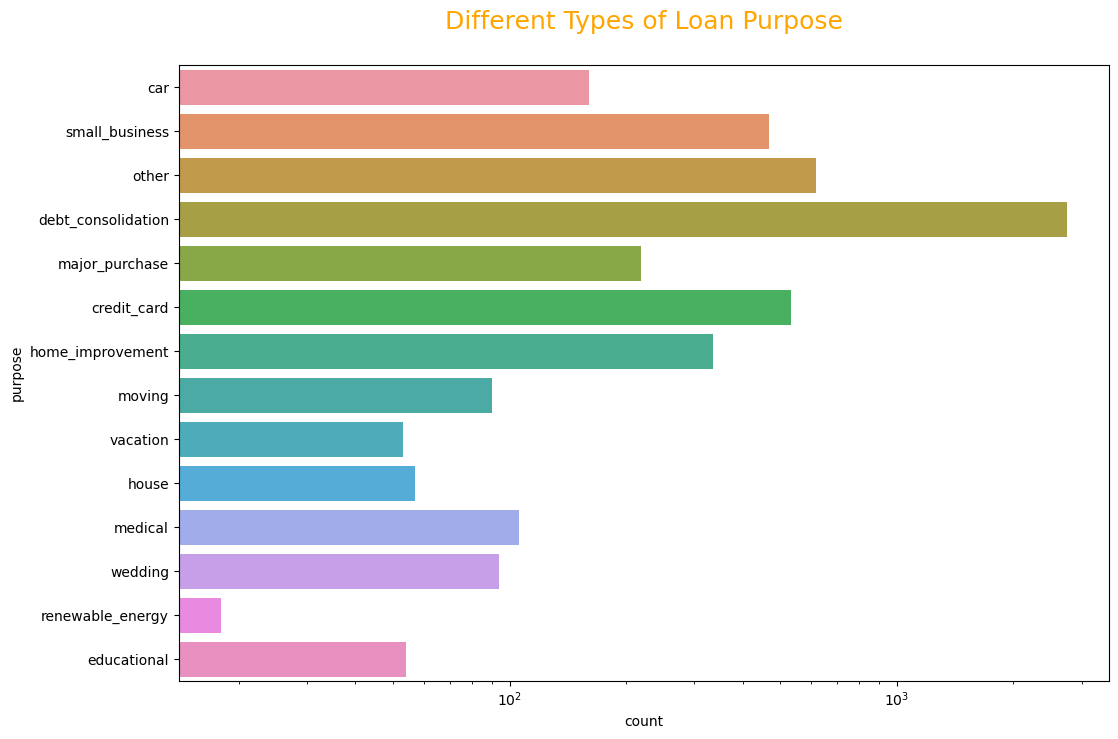

In [40]:
## Analyze purpose with loan status
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=loan_df[loan_df.loan_status == 'Charged Off'])
plt.title("Different Types of Loan Purpose\n",fontdict={'fontsize':18, 'color':'orange'})
plt.show()

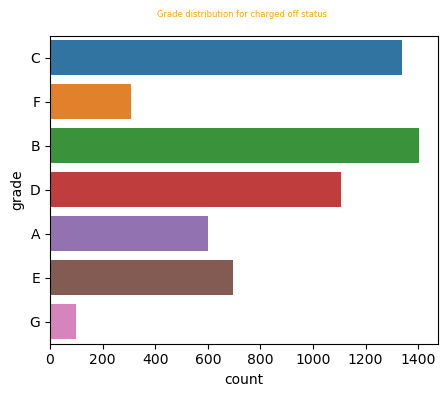

In [41]:
## Analyze grade with loan status
fig, ax = plt.subplots(figsize = (5,4))
sns.countplot(y ='grade', data=loan_df[loan_df.loan_status == 'Charged Off'])
plt.title("Grade distribution for charged off status \n",fontdict={'fontsize':6, 'color':'orange'})
plt.show()

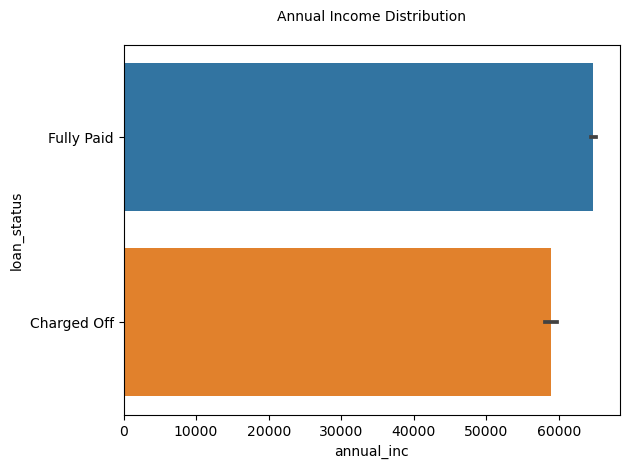

In [42]:
## Analyze loan status with annual income
sns.barplot(x=loan_df["annual_inc"],y=loan_df["loan_status"])
plt.title("Annual Income Distribution\n",fontdict={'fontsize':10})
plt.show()

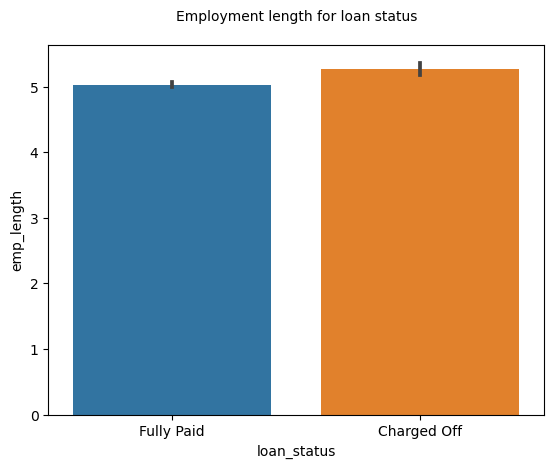

In [43]:
## Analyze loan status with emplength
sns.barplot(y=loan_df["emp_length"],x=loan_df["loan_status"])
plt.title("Employment length for loan status\n",fontdict={'fontsize':10})
plt.show()

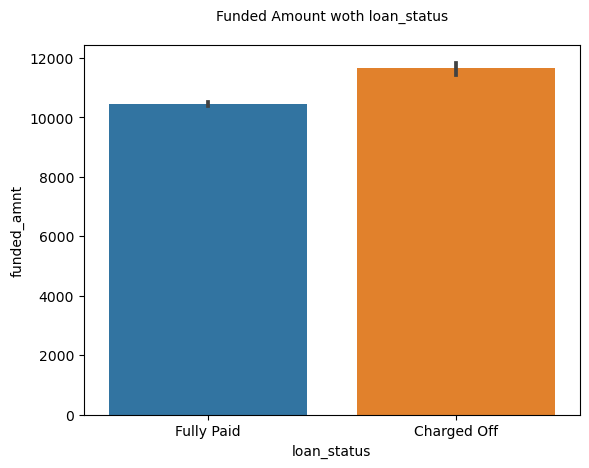

In [44]:
## Analyze funded amount with loan status
sns.barplot(y=loan_df["funded_amnt"],x=loan_df["loan_status"])
plt.title("Funded Amount woth loan_status\n",fontdict={'fontsize':10})
plt.show()

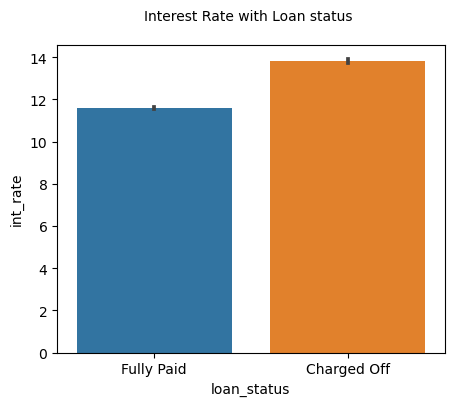

In [45]:
#Analyze loan status with interest rate
fig, ax = plt.subplots(figsize = (5,4))
sns.barplot(data=loan_df,x='loan_status',y='int_rate')
plt.title("Interest Rate with Loan status \n",fontdict={'fontsize':10})
plt.show()

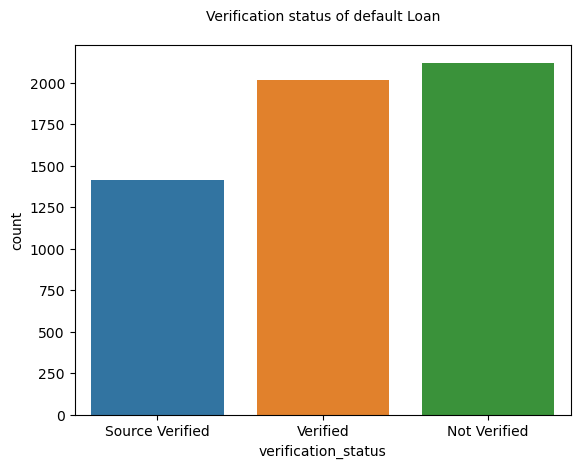

In [46]:
#Analyze loan status with Verification status
sns.countplot(data=loan_df[loan_df['loan_status']=='Charged Off'],x='verification_status')
plt.title("Verification status of default Loan\n",fontdict={'fontsize':10})
plt.show()

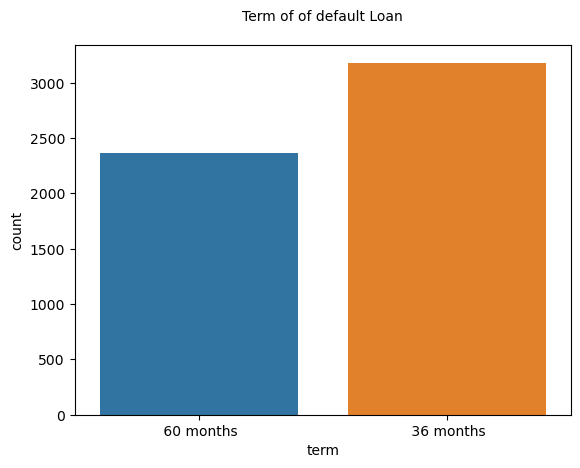

In [47]:
#Analyze loan status with term
sns.countplot(data=loan_df[loan_df['loan_status']=='Charged Off'],x='term')
plt.title("Term of of default Loan\n",fontdict={'fontsize':10})
plt.show()

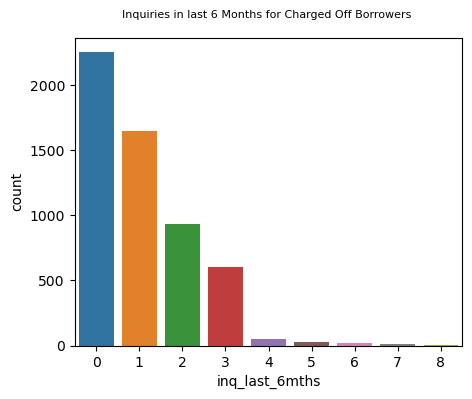

In [48]:
#Analyze loan status with inquires in last 6 months
fig, ax = plt.subplots(figsize = (5,4))
sns.countplot(data=loan_df[loan_df['loan_status']=='Charged Off'],x='inq_last_6mths')
plt.title("Inquiries in last 6 Months for Charged Off Borrowers \n",fontdict={'fontsize':8})
plt.show()

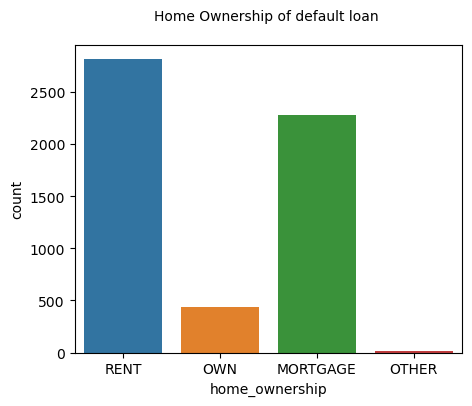

In [49]:
#Analyze loan status with home ownership
fig, ax = plt.subplots(figsize = (5,4))
sns.countplot(data=loan_df[loan_df['loan_status']=='Charged Off'],x='home_ownership')
plt.title("Home Ownership of default loan \n",fontdict={'fontsize':10})
plt.show()

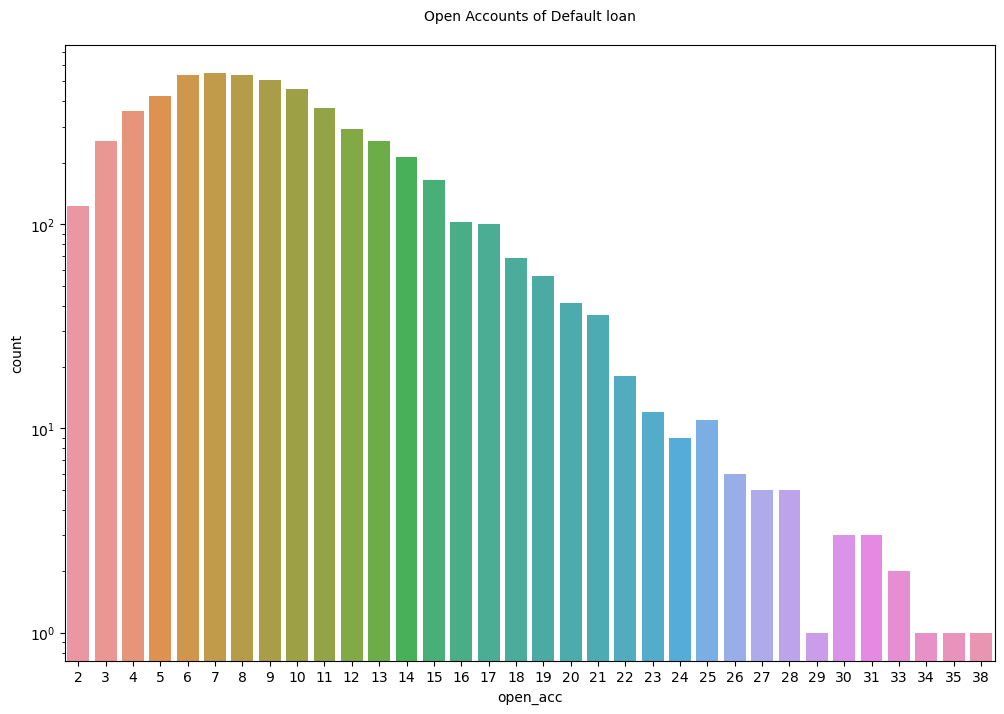

In [50]:
#Analyze loan status with open accounts
fig,ax = plt.subplots(figsize = (12,8))
ax.set_yscale('log')
sns.countplot(data=loan_df[loan_df['loan_status']=='Charged Off'],x='open_acc')
plt.title("Open Accounts of Default loan\n",fontdict={'fontsize':10})
plt.show()

#### Segmented Univariant Analysis

In [51]:
#Creating bins for int_rate,annual Income,Loan amount
loan_df['int_rate_bucket'] = pd.qcut(loan_df['int_rate'],[0,0.2,0.4,0.6,0.8,1],['5%-9%','9%-13%','13%-17%','17%-21%','21%-25%'])

loan_df['annual_inc_bucket'] = pd.qcut(loan_df['annual_inc'], [0,0.2,0.4,0.6,0.8,1],['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

loan_df['loan_amnt_bucket'] = pd.qcut(loan_df['loan_amnt'], [0,0.2,0.4,0.6,0.8,1],['0-7k','7k-14k','14k-21k','21k-28k','28k-35k'])

#### Derived variable Analysis depending on grouping 

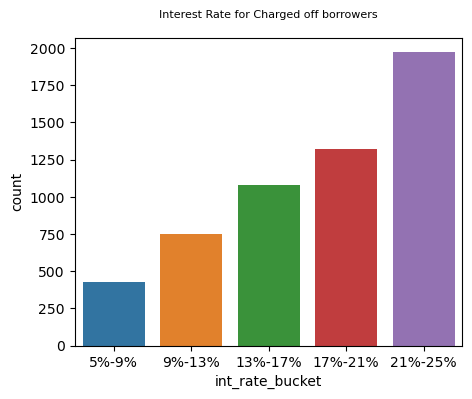

In [52]:
#Analyze Derived columns 
## analyze int_rate_bucket
fig, ax = plt.subplots(figsize = (5,4))
sns.countplot(data=loan_df[loan_df.loan_status == 'Charged Off'],x='int_rate_bucket')
plt.title("Interest Rate for Charged off borrowers\n",fontdict={'fontsize':8})
plt.show()

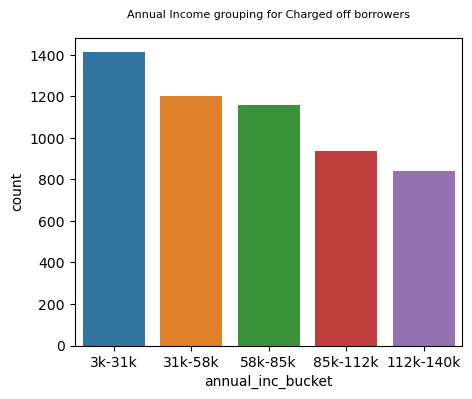

In [53]:
# Analyze annual_inc_bucket
fig, ax = plt.subplots(figsize = (5,4))
sns.countplot(data=loan_df[loan_df.loan_status == 'Charged Off'],x='annual_inc_bucket')
plt.title("Annual Income grouping for Charged off borrowers\n",fontdict={'fontsize':8})
plt.show()

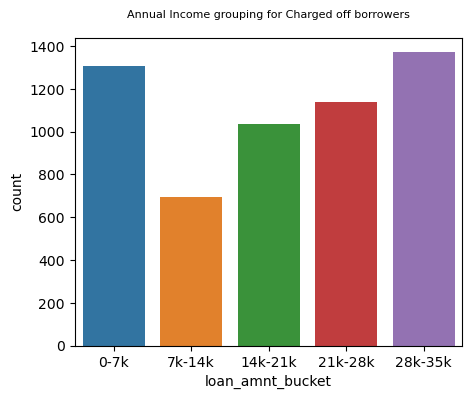

In [54]:
# Analyze loan_amnt_bucket
fig, ax = plt.subplots(figsize = (5,4))
sns.countplot(data=loan_df[loan_df.loan_status == 'Charged Off'],x='loan_amnt_bucket')
plt.title("Annual Income grouping for Charged off borrowers\n",fontdict={'fontsize':8})
plt.show()

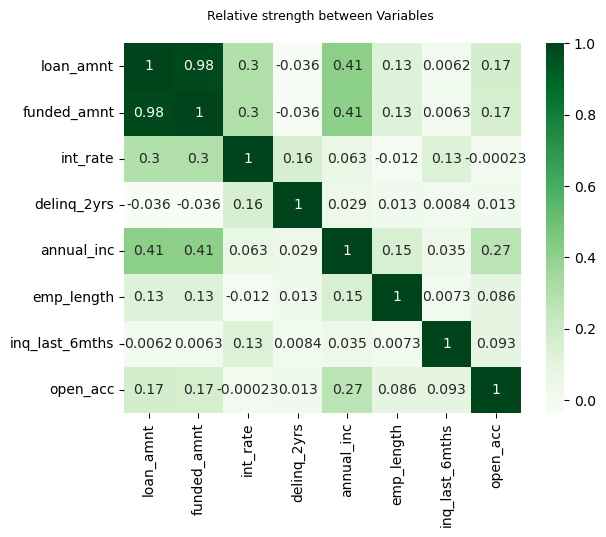

In [55]:
# Relational strength between numerical variables
sns.heatmap(loan_df[num_cols].corr(),cmap='Greens',annot=True)
plt.title("Relative strength between Variables \n",fontdict={'fontsize':9})
plt.show()

### Multivariant Analysis

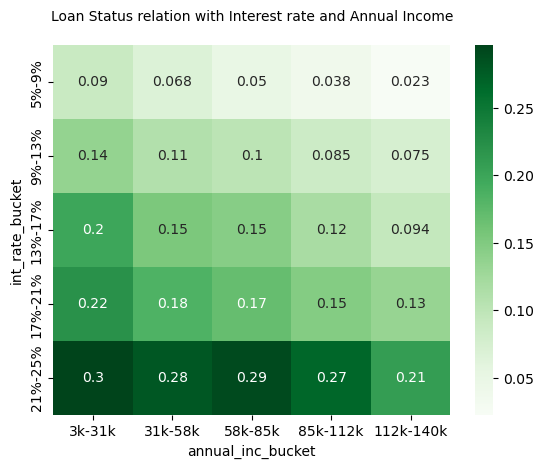

In [56]:
# Analyze interest rate and annual income ranges with loan status
result=pd.pivot_table(data=loan_df,index='int_rate_bucket',columns='annual_inc_bucket',values='der_loan_status')
sns.heatmap(result,cmap='Greens',annot=True)
plt.title("Loan Status relation with Interest rate and Annual Income\n",fontdict={'fontsize':10})
plt.show()


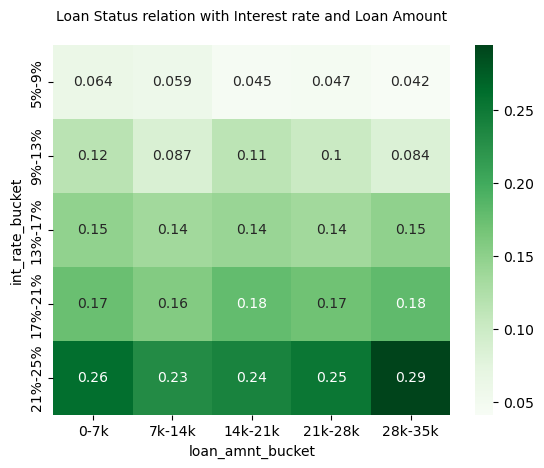

In [57]:
# Analyze interest rate and loan amount ranges with loan status
result=pd.pivot_table(data=loan_df,index='int_rate_bucket',columns='loan_amnt_bucket',values='der_loan_status')
sns.heatmap(result,cmap='Greens',annot=True)
plt.title("Loan Status relation with Interest rate and Loan Amount\n",fontdict={'fontsize':10})
plt.show()

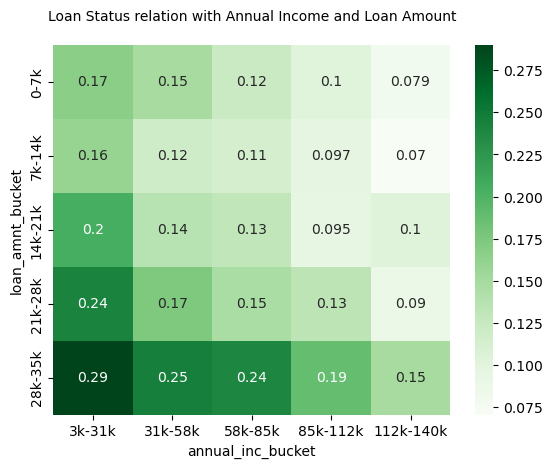

In [58]:
# Analyzeloan amount  and annual income ranges with loan status
result=pd.pivot_table(data=loan_df,index='loan_amnt_bucket',columns='annual_inc_bucket',values='der_loan_status')
sns.heatmap(result,cmap='Greens',annot=True)
plt.title("Loan Status relation with Annual Income and Loan Amount\n",fontdict={'fontsize':10})
plt.show()

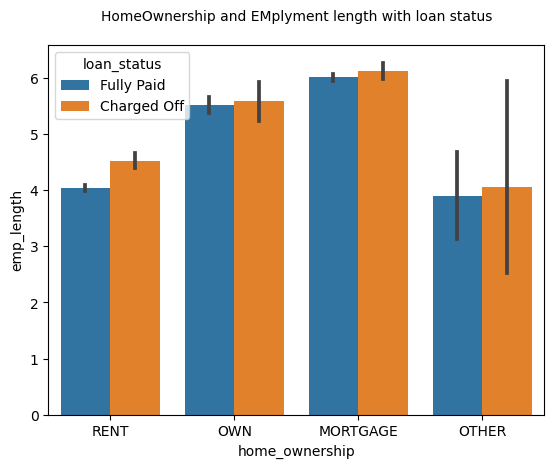

In [59]:
# HomeOwnership and EMplyment length with loan status
sns.barplot(x=loan_df["home_ownership"],y=loan_df["emp_length"],hue=loan_df["loan_status"])
plt.title("HomeOwnership and EMplyment length with loan status\n",fontdict={'fontsize':10})
plt.show()

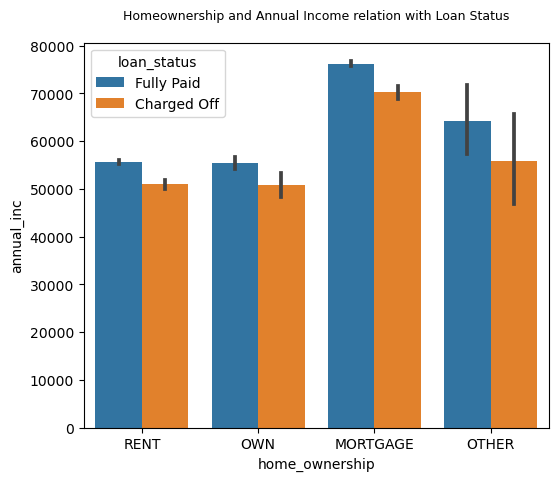

In [60]:
# Analyze annual_inc/home_ownership with loan status
plt.figure(figsize=(6,5))
sns.barplot(data =loan_df,x='home_ownership', y='annual_inc', hue ='loan_status')
plt.title("Homeownership and Annual Income relation with Loan Status\n",fontdict={'fontsize':9})
plt.show()

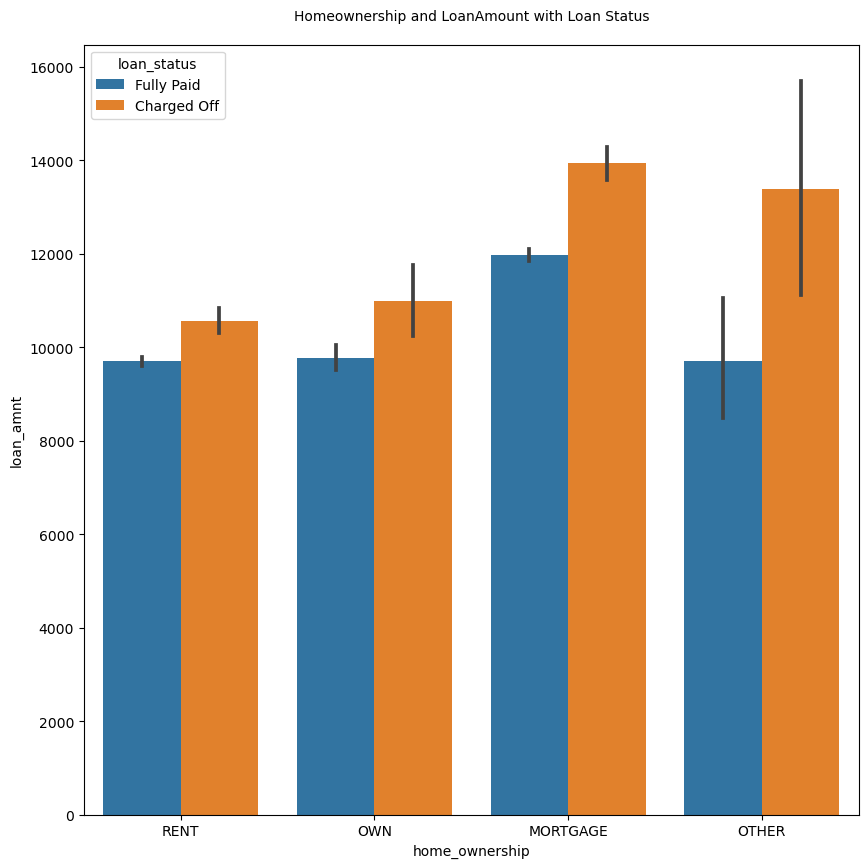

In [61]:
# Analyze annual_inc/home_ownership with loan status
plt.figure(figsize=(10,10))
sns.barplot(data =loan_df,x='home_ownership', y='loan_amnt', hue ='loan_status')
plt.title("Homeownership and LoanAmount with Loan Status\n",fontdict={'fontsize':10})
plt.show()

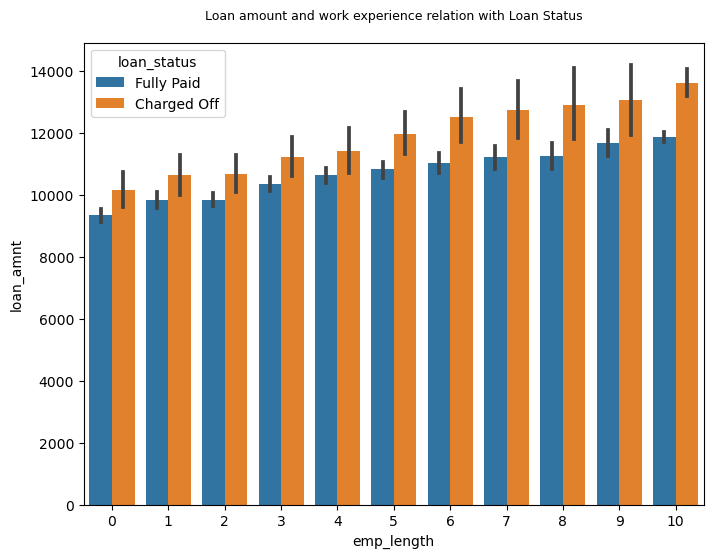

In [62]:
# Analyze Employee length and loan amount with loan status
plt.figure(figsize=(8,6))
sns.barplot(data =loan_df,x='emp_length', y='loan_amnt', hue ='loan_status')
plt.title("Loan amount and work experience relation with Loan Status\n",fontdict={'fontsize':9})
plt.show()

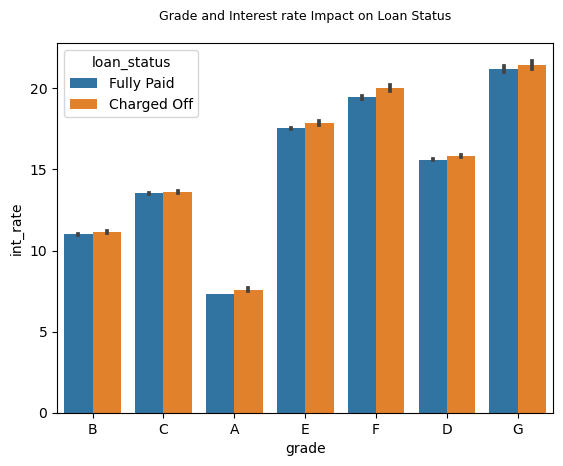

In [63]:
# Analyze Grade and interest rate with loan status
sns.barplot(data =loan_df,x='grade', y='int_rate', hue ='loan_status')
plt.title("Grade and Interest rate Impact on Loan Status\n",fontdict={'fontsize':9})
plt.show()

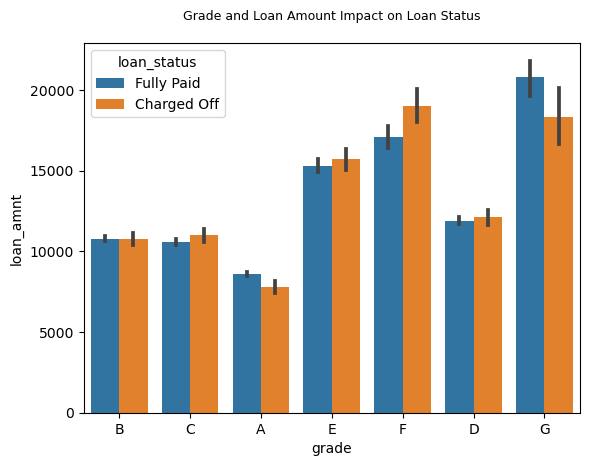

In [64]:
# Analyze Grade and interest rate with loan status
sns.barplot(data =loan_df,x='grade', y='loan_amnt', hue ='loan_status')
plt.title("Grade and Loan Amount Impact on Loan Status\n",fontdict={'fontsize':9})
plt.show()

### Insights

### Observation of Univarant Analysis

###### Loan Amount and Funded Amount varies from 500 to 35000
###### Maximum customers have loan amount in range 5000 to 11000
###### Interes rate varies from 5 to 24 %
###### Purpose of most of loan applicants is debt consolidation and then Credit Card
###### Loans with a term of 36 months are more compared to 60 months.
###### Maximum applicants have almost near abouut 10 years of working experience
###### About 50% of the borrowers are verified by the company or have source verified.
###### Majority of applicants have low Annual Income.
###### Grade column have values from A to G in order.
###### Overall applicants have Home ownership of 5 types RENT, MORTGAGE, OWN, OTHER, NONE.Very few borrowers have their own house.Most of the customers are rented or MORTGAGE.

### Observation of Bivaraiant Analysis

##### Grade A have lowest interest rate and Grade G have highest interest rate 24%. Interest rate increases with increase in grade from A to G. Most of defaulters fall in Grade G.
##### Loan applicants with purpose of Debt Consolidation have highest number of fully paid loan and defaulted loan.
#####  Default loans have high loan amount and funded loan amount compare to fully paid loan.
##### The term 60 month has higher chance of defaulting than 36 month term.
#####  Loan applicants having their own property or house are less in defaulted loan while there are large number of applicants in default loan those rae rented and mortgage.
#####  Default applicants have low income compare to fully paid applicants.
#####  Interest rate of default customers is more i.e.12 to 14 % than fully paid customers
##### Most of defaulters loan applications are not verified.
##### Default loan borrowers have 0 number of inquires  in last 6 months.

### Observation of Segmented Univariant Analysis

##### Most of the defaulters are in interest rate of 21% to 25%
##### Majority of defaulters have annual income in range 3k to 31k
##### Majority of defaulters have loan amount in range 28k to 35k

###  Observations of Multivariant Analysis

##### Maximun defaulters are with low annual income(3k to 31k) and high interest rate(21% to 25%). Large loan have high chance of default loan.
##### Maximun defaulters are with loan amount(28k to 35k) and high interest rate(21% to 25%)
##### Maximun defaulters are with loan amount(28k to 35k) and annual income(3k to 31k)
##### Customers with Mortagage and having employmnt about 7 years are more likely defaulters
##### Loan amount slightly increases with increase in Employment length.For defaulters it is more compare to fully paid. Most of deafulters have 10 yeras of working experience.
##### Loan applicants with Grade G and interest rate 20 to 24% are more risky.
##### Loan applicants with Grade F and loan amount 16 to 20k are in defaulters.
##### Borrowers having open accounts 27 to 35 and loan amount 12k to 14k more likey to defaulters.


## Final Result

#### Major Driving factors which can be used to find out or predict default customers and  avoiding Credit Loss.
    Grade
    Annual Income
    Verification Status    
#### Home Ownership, Interest rate ,Term, Delt 2 years also impact analysis of default customers.
#### Consideration for default customers are
#####   Customers with low annual income(3k to 31k) and high interest rate(21% to 25%) ,loan amount of28k to 35k).
#####   Customers with low Grade like F,G and high interest rate 20% to 24%.
#####   Customers not having their own property and are rented or mortgage and having 10 years of working experience.
   
    

